# Analise de Motores

### Grandezas vs Empuxo

[Regressão Linear Youtube](https://www.youtube.com/watch?v=gzyq_6wdtSk)


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd

In [41]:
#data = pd.read_csv(r"C:\Users\Fernando\Desktop\Skyrats\AirA2508RaceStar.csv",
       # names=["kv", "Mdiametro", "MAltura", "tensao",
       # "npas", "propdiam", "proppitch", "corrente", "empuxog", "potencia", "eficienciaGpW"],
       # sep=r'\s*,\s*',
       # engine='python',
       # na_values="?")

#data.shape
#data.head()

### Funções uteis

In [59]:
def plota(i,empuxo):
    plt.plot(i, empuxo, color = 'blue', label = 'Empuxo [g]')
    plt.suptitle('Comparativo AirA2508RaceSta')
    plt.xlabel('Corrente')
    plt.ylabel('Empuxo [g]')
    plt.grid()
    plt.legend(loc = 'best')
    plt.show()
    
def regressao_linear_do_youtube(x,y):
    p1 = np.polyfit(x,y,1) # fornece os valores do intercepto e a inclinação

    yfit = p1[0] * x + p1[1] # calcula os valores preditos
    yresid = y - yfit # resíduo = valor real - valor ajustado (valor predito)
    SQresid = sum(pow(yresid,2)) # soma dos quadrados dos resíduos 
    SQtotal = len(y) * np.var(y) # número de elementos do vetor y vezes a variância de y
    R2 = 1 - SQresid/SQtotal # coeficiente de determinação

    print("Coeficiente Linear  " + str(p1[0])) # imprime o intercepto e a inclinação
    print("Coeficiente Angular  " + str(p1[1]))
    #print("Coeficiente determinação" + str(R2)) # imprime coeficiente de determinação

    import matplotlib.pyplot as plt

    plt.plot(x,y,'o')
    plt.plot(x,np.polyval(p1,x),'g--')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

## Analise de corrente vs Empuxo

In [60]:
i = np.array([2.35,2.94,3.49,4.06,4.85,5.6,6.49,7.46,8.86,10.12,11.35])
empuxo = np.array([256.3,297.2,342.6,392.73,439.96,496.11,553.23,616.86,703.17,770.17,826.89])

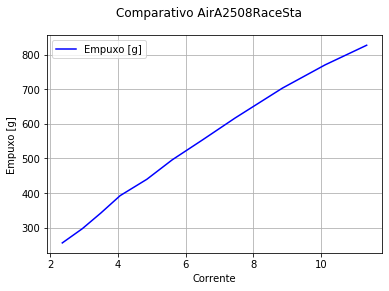

Coeficiente Linear  64.28511800601902
Coeficiente Angular  122.86132512120858


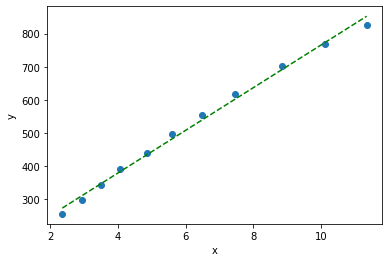

In [61]:
plt.plot(i, empuxo, color = 'blue', label = 'Empuxo [g]')
plt.suptitle('Comparativo AirA2508RaceSta')
plt.xlabel('Corrente')
plt.ylabel('Empuxo [g]')
plt.grid()
plt.legend(loc = 'best')
plt.show()

regressao_linear_do_youtube(i,empuxo)

In [62]:
i2 = np.array([3.15,3.80,4.71,5.58,6.57,7.88,9.15,10.60,12.24,14.66,
16.77])
e2 = np.array([376.38,
436.77,
496.06,
579.68,
660.11,
765.15,
860.32,
957.67,
1032.65,
1177.96,
1244.59])

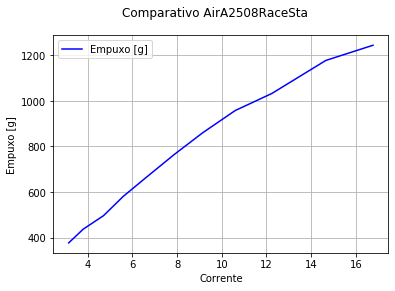

Coeficiente Linear  65.81754157649493
Coeficiente Angular  211.58487460541528


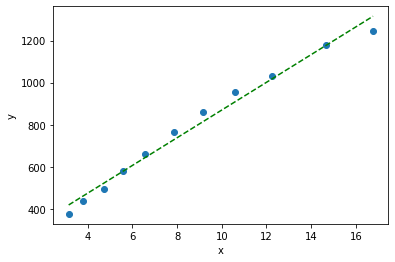

In [64]:
plota(i2,e2)
regressao_linear_do_youtube(i2,e2)

In [52]:
i3 = np.array([5.44,
6.89,
8.81,
10.80,
12.84,
15.26,
17.84,
20.69,
23.45,
26.30,
29.87])
e3 = np.array([555.01,
658.61,
786.10,
922.81,
1029.00,
1144.29,
1271.13,
1386.20,
1489.51,
1599.42,
1707.04])

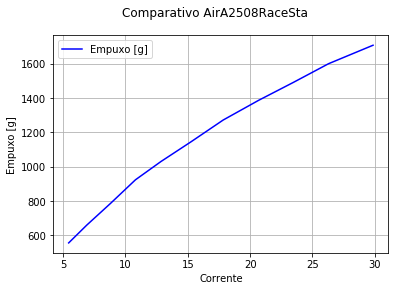

Coeficiente Linear  47.04964495264549
Coeficiente Angular  378.6676150807361


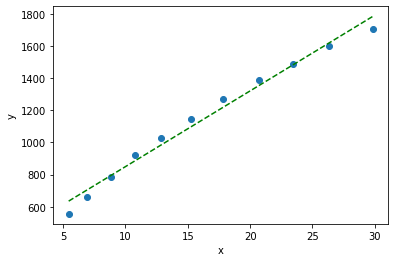

In [65]:
plota(i3,e3)
regressao_linear_do_youtube(i3,e3)

In [33]:
ioutro = np.array([7.17,
9.18,
11.22,
13.24,
15.63,
18.27,
21.00,
23.77,
26.83,
30.09,
33.43])
eoutro = np.array([430.81,
525.11,
605.75,
673.45,
743.35,
830.5,
904.24,
974.07,
1053.40,
1118.69,
1181.76])

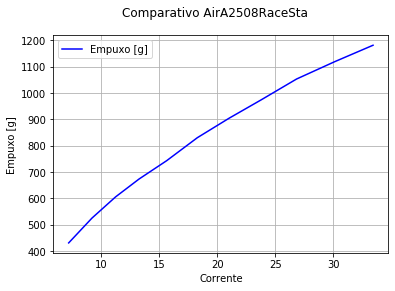

Coeficiente Linear  28.276234593188036
Coeficiente Angular  282.5388813919418


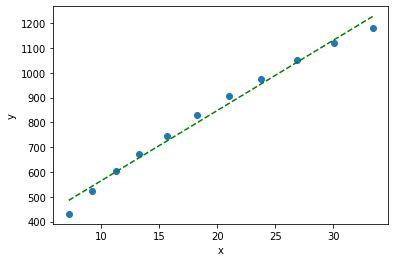

In [66]:
plota(ioutro,eoutro)
regressao_linear_do_youtube(ioutro,eoutro)

In [85]:
#Não acredito no youtube então farei a minha regressão

def minha_regressao_linear(ti,bi,grandeza_ti = "x",grandeza_bi = "y"):
    
    import numpy as np
    
    m = len(ti)
    soma_ti = sum(ti)
    aux = []
    for i in range(len(ti)):
        aux.append(ti[i]**2)
    soma_ti2 = sum(aux)
    
    soma_bi = sum(bi)
    
    aux2 = []
    for i in range(len(ti)):
        aux2.append(ti[i]*bi[i])
        
    soma_tibi = sum(aux2)

    A = np.matrix([[m,soma_ti],[soma_ti,soma_ti2]])
    b = np.matrix([[soma_bi],[soma_tibi]])
    
    x = np.linalg.inv(A)*b
    
    a = x.item(0)
    b = x.item(1)
    
    import matplotlib.pyplot as plt

    plt.plot(ti,bi,'o')
    plt.plot(ti,np.polyval([b,a],ti),'g--')
    plt.xlabel(grandeza_ti)
    plt.ylabel(grandeza_bi)
    plt.show()
    
    return a,b

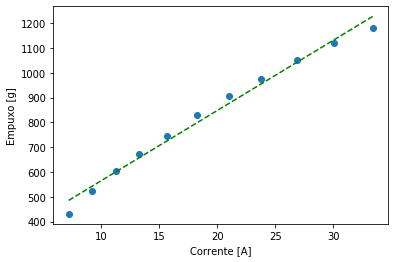

282.5388813919417
28.276234593188008


In [86]:
a,b = minha_regressao_linear(ioutro,eoutro,"Corrente [A]","Empuxo [g]")
print(a)
print(b)

## Tensão vs Empuxo 

Adotamos o valor de corrente em torno de 10 A - Motor Air A 2508 Race Star



In [36]:
#v 
x= np.array([19.75,23.71,15.82,])
#empuxo
y= np.array([770.17,957.67,922.81,])

-6